# 1번 문제 EDA 

1. 결측치를 확인하고, 결측치 제거하세요. 
2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요. 
3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요. 


###  예제 데이터 설명 

## 고객 정보 데이터 
* ID: 고객의 고유 식별자
* Year_Birth: 고객의 출생 연도
* Marital_Status: 고객의 결혼 여부
* Income: 고객의 연간 가계 소득
* Kidhome: 고객 가구의 어린이 수
* Teenhome: 고객 가구의 청소년 수

## Products 
* MntWines: 지난 2년 동안 와인에 소비한 금액
* MntFruits: 지난 2년 동안 과일에 소비한 금액
* MntMeatProducts: 지난 2년 동안 육류에 소비된 금액
* MntFishProducts: 지난 2년 동안 생선에 소비한 금액
* MntSweetProducts: 지난 2년간 사탕에 소비한 금액

## Place 
* NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
* NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
* NumStorePurchases: 매장에서 직접 구매한 횟수
* NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수



In [2]:
pwd

'/home/spa/miniconda3/envs/adp/lib/python3.7/site-packages/statml/data/one/8_training'

In [3]:
#1번 답안 작성 시작! 
import pandas as pd 
import numpy as np 
data = pd.read_csv("../data/26_problem1.csv")
data

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


In [4]:
## 결측치 확인 가능
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

## 1. 결측치가 있느나 결측치가 전체적으로 많이 있는 것이 아닌, Income 에만 소수(24개)만 존재하여 평균으로 보간 하겠습니다. 

In [5]:
Income_mean = data["Income"].mean()
data.loc[data["Income"].isna()==True,"Income"] = Income_mean
data.isna().sum()

ID                     0
Year_Birth             0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [6]:
box_col = data.columns.drop(['ID','Marital_Status'])
box_col

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

## 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요.

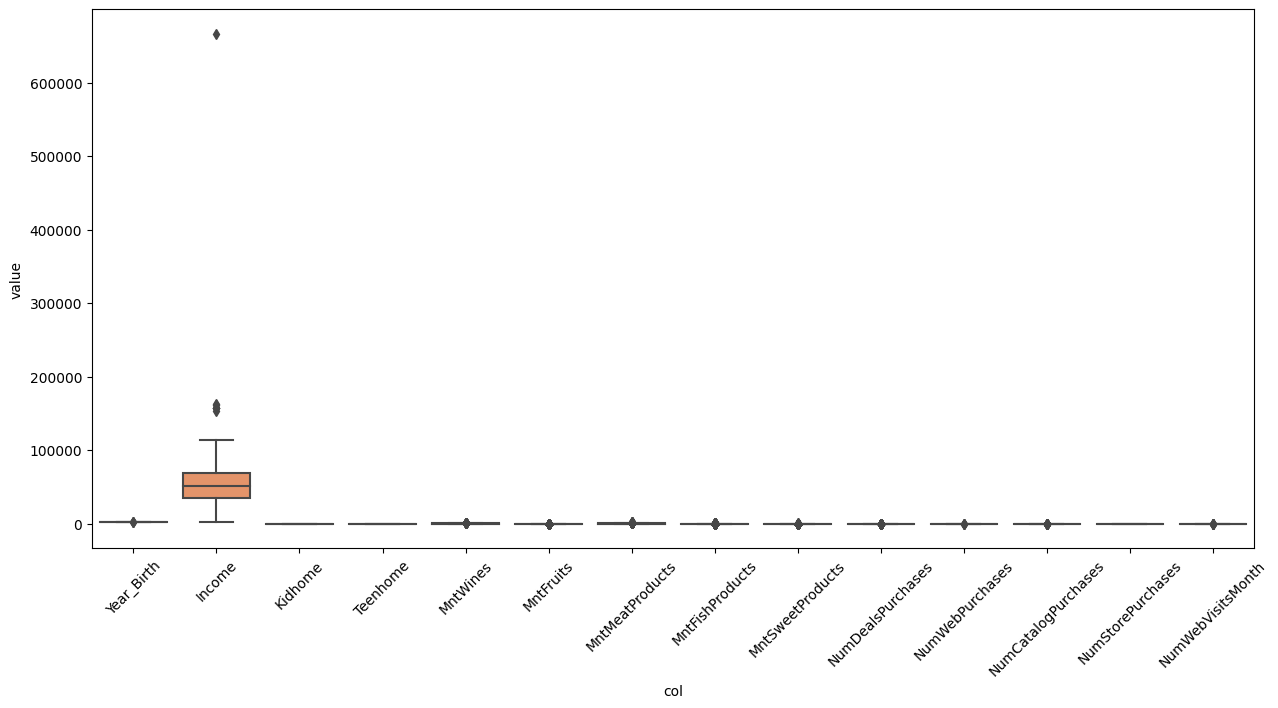

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## boxplot을 그리기 위해 범주형 변수 제거한 columns 활용 
X = data[box_col]
df_v1 = pd.melt(X ,var_name='col', value_name='value')
df_v1

plt.figure(figsize = (15, 7))
sns.boxplot(x = 'col', y = 'value', data = df_v1)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.show()

In [8]:
## Income에 이상치가 존재하므로 제거필요 
## IQR 개념 사용 - 강의 참조 ADP실기 클래스 Part1_4.3 결측치, 이상치 처리 

# IQR 을 이용한 이상치 탐색 함수

def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

In [9]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음 

out_index = detect_outliers(df=data, column='Income')
data.loc[out_index]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.0,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.0,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.0,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.0,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.0,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.0,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.0,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,666666.0,1,0,9,14,18,8,1,4,3,1,3,6


## 6666666 값만 이상치로 판단, Income의 경우 높은 소수의 집단 있을 수 있다고 판단

In [10]:
data.loc[out_index[-1],"Income"] = Income_mean
data.loc[out_index]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.000000,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.000000,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.000000,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.000000,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.000000,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.000000,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.000000,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,52247.251354,1,0,9,14,18,8,1,4,3,1,3,6


# 1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요.

### 추가 전처리 군집분석을 하기 위해서는 범주형 변수 Marital_Status 인코딩 필요 

In [11]:
df_dum= pd.get_dummies(data,columns=['Marital_Status'])
df_dum

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,709,43,182,42,118,...,4,5,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,406,0,30,0,0,...,5,7,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,908,48,217,32,12,...,13,6,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,428,30,214,80,30,...,10,3,0,0,0,0,0,1,0,0


In [12]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

최적의 클러스터 개수를 결정하는데 사용되는 방법 (2)   
* 엘보우 기법
    - 클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교
    - 클러스터 개수를 늘려나가면서 계산한 SSE를 비교
    - 어느 순간 줄어드는 비율이 급격하게 작아지는 부분이 생김 (=팔꿈치, eblow)
    - 그 부분이 최적의 클러스터 개수임


In [13]:
# 필요한 모듈
from sklearn.cluster import KMeans

def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

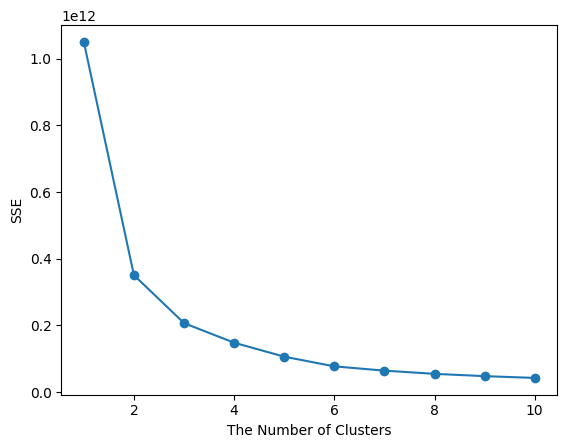

[1049913737792.9431, 350560530459.4122, 206763775488.31912, 148110104399.84708, 106148167088.99995, 77128685702.76324, 64286788886.43512, 54691019569.57751, 47797879128.826294, 42468526329.235405]


In [14]:
elbow(df_dum)

In [15]:
# K-Means 군집화 실행
km = KMeans(n_clusters = 3, random_state=1)
km.fit(df_dum)

KMeans(n_clusters=3, random_state=1)

In [16]:
# 할당된 군집을 credit 데이터에 추가
new_labels = km.labels_
data['cluster'] = new_labels
data

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7,2
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5,2
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4,0
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6,1
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,2
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7,2
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6,2
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3,0



# 2. 군집분석

1. 위에서 생성한 군집들의 특성을 분석하세요. 
2. 각 군집 별 상품을 추천하세요.  
3. ID가 10870인 고객을 대상으로 상품을 추천하세요.


In [17]:
data.cluster.value_counts()

2    812
1    741
0    687
Name: cluster, dtype: int64

In [18]:
group_mean = data.groupby("cluster").mean()
group_mean.reset_index(inplace=True)
group_mean

,cluster,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,5770.388646,1967.429403,76967.652111,0.084425,0.350801,616.861718,57.052402,397.494905,82.835517,60.053857,1.605531,5.398836,5.457060,8.401747,3.155750
1,1,5662.222672,1973.105263,28348.147099,0.808367,0.311741,30.568151,5.990553,25.570850,9.068826,6.056680,2.141700,2.156545,0.529015,3.082321,6.908232
2,2,5377.431034,1966.046798,52385.061926,0.416256,0.815271,288.646552,18.821429,100.912562,25.158867,18.320197,3.100985,4.732759,2.243842,6.051724,5.692118


In [19]:
## 고객 정보 데이터 
group_mean[["Year_Birth","Income","Kidhome","Teenhome"]]

,Year_Birth,Income,Kidhome,Teenhome
0,1967.429403,76967.652111,0.084425,0.350801
1,1973.105263,28348.147099,0.808367,0.311741
2,1966.046798,52385.061926,0.416256,0.815271


In [20]:
## 소비 제품 데이터 
Mnt_group = group_mean[["cluster",'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']]
Mnt_group.set_index("cluster",inplace=True)
Mnt_group

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,616.861718,57.052402,397.494905,82.835517,60.053857
1,30.568151,5.990553,25.570850,9.068826,6.056680
2,288.646552,18.821429,100.912562,25.158867,18.320197


In [21]:
sum_group_Mnt = np.array(Mnt_group.sum(1))
sum_group_Mnt.reshape(3,1)

array([[1214.29839884],
       [  77.25506073],
       [ 451.85960591]])

In [22]:
Mnt_group/sum_group_Mnt.reshape(3,1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,0.507998,0.046984,0.327345,0.068217,0.049456
1,0.395678,0.077543,0.330993,0.117388,0.078398
2,0.638797,0.041653,0.223327,0.055679,0.040544


### 2-2. 위에서 생성한 군집들의 특성을 분석하세요.

## A. 소비특징 
1. 0번 그룹 : 평균연령 1967년생, 소득이 가장 많은 집단으로 전체 구매 수 1214로 가장 높고 그 중 와인의 구매가 가장 많고,  타 그룹과 비율로 보았을 때 Wine 의 비율이 높다. 
<br><br>
2. 1번 그룹 : 가장 어린 집단(평균 1973년생) 소득의 평균도 낮고, 소비가 가장 적은 집단이다. 전체 구매 수가 77로 가 현저히 낮으며 소비의 타 그룹가 비교하였을 때, 비율에서는 고기와 과자, 과일의 비율이 가장 높다. / 전체적인 소비보다는 특정 상품의 소비의 비율이 높다 
<br><br>
3. 2번 그룹 : 소득과 소비가 중간이다. 타 그룹과 비교하였을 때, 와인의 구매비율이 0.638로 가장 높다. 

# 2번 정답
## 0번 그룹 : 와인 
## 1번 그룹 : 고기 
## 2번 그룹 : 와인 

In [23]:
## 구매채널데이터 
Num_group = group_mean[["cluster",'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
Num_group.set_index("cluster",inplace=True)
Num_group

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
cluster,,,,,
0,1.605531,5.398836,5.457060,8.401747,3.155750
1,2.141700,2.156545,0.529015,3.082321,6.908232
2,3.100985,4.732759,2.243842,6.051724,5.692118


In [24]:
sum_group_Num = np.array(Num_group.sum(1))
sum_group_Num.reshape(3,1)
Num_group/sum_group_Num.reshape(3,1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
cluster,,,,,
0,0.066844,0.224774,0.227198,0.349797,0.131386
1,0.144536,0.145537,0.035701,0.208015,0.466211
2,0.142107,0.216886,0.102827,0.277329,0.260850


## B. 마케팅 특징 
1. 0번 그룹 : Store에서 직접 구매하는 비율이 가장 높다 , 다른 그룹보다 카탈로그를 많이 이용하는 편이다, 할인은 신경 안쓰는편 

2. 1번 그룹 : 지난 달에는 웹사이트에서 구매하는 비율이 가장 높았으나, 이번달에는 홈페이지 구매가 낮아졌다. 원인 파악이 필요. <br> 
              이번 달에는 오히려 웹사이트보다는 직접 매장에서 구매하였다. 

3. 2번 그룹 : 웹, 매장의 비중이 비슷하다. 하지만 카탈로그로 구매하는 비율이 가장 적으므로 해당 그룹에는 카탈로그보다는 웹, 매장 홍보가 필요하다. 

* NumDealsPurchases : 할인된 상품  구매 횟수 
* NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
* NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
* NumStorePurchases: 매장에서 직접 구매한 횟수
* NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수

In [25]:
## 고객 특성만을 가지고 시각화 , 뚜렷하게 나눠지는 것은 Income 변수로 그룹이 나눠짐을 알 수 있음 
import seaborn as sns 

sns.pairplot(data[pair_col1], hue="cluster")
plt.show()

NameError: name 'pair_col1' is not defined

In [ ]:
## 고객 구매이력을 가지고 시각화 , 뚜렷하게 나눠지는 것은 Income 변수로 그룹이 나눠짐을 알 수 있음 
import seaborn as sns 

sns.pairplot(data[pair_col2], hue="cluster")
plt.show()

## 2-3. ID가 10870인 고객을 대상으로 상품을 추천하세요.

In [ ]:
data.loc[data["ID"]==10870]

1. 10870 고객은 2번집단이다. 와인의 구매비율이 높은 집단으로 와인 상품을 추천하는 것이 소비비율의 특징을 보았을 때 적절하다고 판단된다. 
2. 2번 집단의 특성상, 웹, 매장에서 구매하는 비율이 높았다. 해당 고객은 지난달 구매수와 이번달 구매 수를 보니 웹사이트를 많이 이용하는 고객으로 보이므로 웹사이트 추천을 하는 것이 좋아보인다. 